# Measuring Matter Antimatter Asymmetries at the Large Hadron Collider


# Introduction
### Press the grey arrow to expand that section
____

<b> Welcome to the first guided LHCb Open Data Portal project! </b>

<div align="justify">Here you will be able to analyse data taken by the Large Hadron Collider (LHC) at CERN. The aim of this study is for you to be able to search for differences in the behaviour of matter and [antimatter](https://en.wikipedia.org/wiki/Antimatter). This project will enable you to carry out your own data analysis at a level similar to that of CERN research. This project does not require a detailed knowledge of particle physics. It is most suitable for people with a scientific and mathematical background equivalent to that required for applying for university entrance in a science, technology engineering or mathematics discipline. Some previous familiarity with computer programming would also be advantageous. Additional theoretical information or programming knowledge you might need is provided as the project progresses.</div>

<div align="justify">Before you start, you might find it helpful to find out more about matter antimatter asymmetries, what we hope to learn by studying them, and how we can detect them with experiments such as the LHCb experiment at CERN.</div>

<ul>
<li> Why do we think there is Matter Antimatter Asymmetry in the Universe? 
Have a look at some [CERN information on Matter Antimatter Asymmetry](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry). </li>

<li> What is CP violation? 
You can find out more [here](http://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) or in more detail [here](Background-Information-Notebooks/CPViolationInsertNEW.ipynb).</li>

<li> How do particle physics experiments allow us to study the conditions of the early universe ?
[Here is a brief overview of the stages of the universe](Background-Information-Notebooks/ParticlePhysicsExperimentsNEW.ipynb).</li>

<li> what are the [Elementary Particles](https://en.wikipedia.org/wiki/Elementary_particle) of which all matter and antimatter is made ?. CERN has also released a [video about the Standard Model of Particle Physics](https://www.youtube.com/watch?v=V0KjXsGRvoA).</li>

<li>How does the [LHCb Experiment](http://lhcb-public.web.cern.ch/lhcb-public/en/Physics/Beauty-en.html) conduct its research on matter antimatter asymmetries ?.</li>
</ul>
* What is the [particle physics focus](Background-Information-Notebooks/ParticleIntro.ipynb) of this experiment?

* How does the [detector](Background-Information-Notebooks/DetectorSoftwareDataSample.ipynb) record the data?

# Getting Started

## Aims:
* Become familiar with the help available for programming
* Read the simulation data into the program
____

<div align="justify">Just like researchers at CERN, you will be coding your own analysis. This will use the computer programming language Python. There is no prerequisite of Python language programming experience for following this project. There will be hints available to you helping you along the way. You might find these tutorials on Python helpful:</div>

[Python Tutorial](http://www.tutorialspoint.com/python/)

We have also made an [unrelated example analysis](Example-Analysis.ipynb) that uses similar code that you can adapt for this analysis!

## Reading simulation data

<div align="justify">In order to get started and check the first code that you will be writing works correctly it is best to start by analysing simulated data rather than real data from the LHC. The real data contains not only the type of events that you wish to analyse, known as the 'signal', but also events that can fake these, known as 'background'. The real data measurements are also limited by the resolution of the detector. The simplified simulation data provided here contains only the signal events and provides the results that would be obtained for a perfect detector.</div>

The PhaseSpaceSimulation.root file contains data which has been created through a [Monte Carlo](http://cerncourier.com/cws/article/cern/27924) simulation. These simulations are based on the [Monte Carlo Method](https://en.wikipedia.org/wiki/Monte_Carlo_method).

<b>IMPORTANT</b>: For every code box with code already in it, like the one below you must click in and press control+enter to run the code. This is how you also run your own code. 

If the In [x]: to the left of a codebox changes to In [*]: that means the code in that box is currently running

If you ever want more space to display output of code you can press the + button  in the toolbar to the right of the save button to create another input box!

In [21]:
%pylab inline
import numpy
from ipywidgets import interact
import pandas
import root_numpy

Populating the interactive namespace from numpy and matplotlib


If you are curious what each of these imported elements does, you can find more information on their official websites. [NumPy](http://www.numpy.org/) is the package for scientific computing in Python. [pandas](http://pandas.pydata.org/) is a library of data analysis tools. [root_numpy](https://pypi.python.org/pypi/root_numpy) allows the CERN data analysis package [root](https://root.cern.ch/) to be used with numpy. 


If you want help with coding there is in addition to the [example code](Example-Analysis.ipynb), hints within each section and a [function reference list](Background-Information-Notebooks/FunctionReferences.pdf) you will have to use a pandas dataframe object, a framework that is used for easily working with large data sets. Once you have your data you can use the following code to put your code into a pandas data frame.

In [14]:
folder = 'Data/'

Let us now import the simulated data. This has been done for you to avoid confusion with filenames!
We will also begin the process of downloading the real data now, the file size is over 1GB so this may take some time!

In [15]:
def load_data(filenames, preselection=None):
    # not setting treename, it's detected automatically
    data = root_numpy.root2array(filenames, selection=preselection)
    return pandas.DataFrame(data)

In [43]:
sim_data = load_data(folder + 'PhaseSpaceSimulation.root', preselection=None) 
!wget -O B2HHH_MagnetDown.root https://www.dropbox.com/s/frfi00qc2q831hk/B2HHH_MagnetDown.root?dl=0
!wget -O B2HHH_MagnetUp.root https://www.dropbox.com/s/2mhr6axlffpqm1v/B2HHH_MagnetUp.root?dl=0

<div align="justify">Now that you can access the data, you can use a number of functions which can help you analyse it. You can find these functions in the libraries at the top of the page. Try to make a table of some the information within your data file so that you can get a feel of the typical values for data in the set. You should also find some basic information about the values such as the range for different variables, as this will help with plotting graphs.</div>

The data contains information about lots of events in the detector. An event refers to the results just after a fundamental interaction took place between subatomic particles, occurring in a very short time span The data you have includes the following information about each event: [information list](Background-Information-Notebooks/Event Data.ipynb)

In [ ]:
# make a table of the data variables here 

### Hints

**Panda specific - Creating a table** - Use your *head()*

# Invariant mass recostruction

## Aims:
* Plot a histogram of the momentum for one hadron
* Use kinematic equations to calculate the invariant mass and energy of each event (that we will assume to be kaons)
* Plot the invariant masses of each event on a histogram
___

### Plotting a feature:

You can plot any features of the data in a histogram. Choose any suitable binning that allows you to observed the distribution of the variable clearly. (You can find a discussion about the optimal bin size/number for a histogram [here](https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width)). Try making a histogram for the first hadron’s momentum x-component (H1_PX):




In [ ]:
# make a histogram of the H1_PX variable here

## Adding interesting features

Some variables that are especially interesting for particle physics analyses are the transverse momentum, Pt, the momentum in z-direction, Pz, and the energy of the particle, E. [Here](Background-Information-Notebooks/InterestingVariables.ipynb) is a more detailed discussion of these variables.

When we consider the process of one heavy particle decaying to or splitting into multiple other particles, we need to keep conservation of energy in mind. This includes the momenta of the particles as well as their masses. Remember here, that one can see from the [Energy-momentum relation](https://en.wikipedia.org/wiki/Energy%E2%80%93momentum_relation) that momenta and mass need to be considered alongside each other to deliver enough information for us to be able to deduce the overall energy of the process.

With the help of these variables from the 'daughter' particles, we can identify the [Invariant Mass](https://en.wikipedia.org/wiki/Invariant_mass) of the decay. This then can help us to determine the origin or 'parent' of each particle by making use of [special relativity](Background-Information-Notebooks/SpecialRelativity.ipynb). 

Now, create variables for the energy of each daughter hadron


In [46]:
# calculate and add the momenta and energy variables to the dataframe here

Now add the masses of the hadrons of your choice. For this decay channel,
all 'daughter' particles are Kaons and you can find out the Kaon mass [here](http://pdg.lbl.gov/2014/reviews/rpp2014-rev-charged-kaon-mass.pdf).


In [47]:
# for the three hadrons, make a variable for their masses
# now set these masses to be kaon masses

### Hints

**Histogram plotting** - You should use atleast the paramters: bins(n) and range(x,y) with the hist() function to plot n bins over the range x to y.

**Energy calculation** - Use the mometum and invariant mass values to work out the energy of each hadron.

## Adding features of the $B$ meson

In order to make our particle table complete, you can ake use of what you have learnt about the Invariant Mass to determine the initial momenta of the [B meson](https://en.wikipedia.org/wiki/B_meson), as well as the mass of the B meson. After calculating these, add the values you have found to the data. (Add: B_PX, B_PY, B_PZ, B_P, B_PT, B_E and B_M)


In [ ]:
# create the features of the B meson
# you will have to calculate the mass of the B meson for this

Now add the features of the B meson to the features of the simulation data:

In [ ]:
# now add the features to the data set

Print out the table from step 3 again to see the added features.

In [ ]:
# print the table of the variables again

You can now plot the B meson mass in a histogram:

In [ ]:
# plot the B meson mass in a histogram

Describe what your histogram looks like. You will later produce the same histogram for real data instead of simulated data. What differences do you expect to observe when comparing those two histograms?

### Hint

**Histogram plotting** - It may be worth calculating the range and standard deviation etc... of the mass distribution to find suitable histogram parameters. Alternativley trial and error works too!

# Working with real data and applying cuts
## Aims:
* Filter out data that is not from the B<sup>+</sup> → K<sup>+</sup>K<sup>+</sup>K<sup>−</sup> channel, or the antiparticle equivalent B<sup>-</sup> → K<sup>+</sup>K<sup>-</sup>K<sup>−</sup>

* Plot a new histogram of B-meson mass for the real data and observe how different cuts effect the data
___


Now that you have analysed the simulation data towards some of its features, you can start applying the methods you have used to the real 2011 LHCb run 1 data. This data is collected by the LHCb detectors at CERN. To find out more about how the proton proton collision results in analysable data, look at: 
[The LHCb Detector](http://lhcb-public.web.cern.ch/lhcb-public/en/detector/Detector-en.html)

The data resulting from this process has at this point only been slightly filtered by trigger mechanisms of the detector. A trigger is an automated system within the detector that uses criteria based on interesting physics signatures to rapidly decide which events are worth keeping when only a small fraction of the total can be recorded. These are mostly needed due to limitations of the computing power of detectors. Remember the filenames of the data are B2HHH_MagnetDown.root and B2HHH_MagnetUp.root and that you can pass multiple files into the root2array function.

## Preselection
In order to now find the most suitable further selection cuts, make yourself familiar with [how cuts can affect the significance of the final result](Background-Information-Notebooks/CutsInformation.ipynb). Also feel free to come back to this stage later and adjust your cuts to see the impact on your significance. 

The pre selection you create will be applied for you if give it the name 'preselection'. However if you want to try and apply it yourself you can use a pandas query like...
>newDataFrame = oldDataFrame.query('logical string here')

You want to apply a preselection that
* Filters out non-hadronic channels (i.e. no muons in H1, H2 or H3)
* Has a low probability to be a Pion, beware if you make this cut too harsh you will filter out too much data!
* Has a high probability to be a Kaon
* Filters out too small impact chi-squared impact parameters

As there are a range of many possible preselections too apply we have given an example in the hints, so feel free to use that if you struggle.



In [1]:
# Make your preselction here
# Create it like a string i.e. preselection = "Some logical condition"

This next line of code just loads the real data into a new data frame!
It also applies the preselection that you have created if you called it preselection.

In [11]:
folder = './'  #Changing the folder path because we downloaded the real data into a different place than the simulation data
real_data = load_data([folder + 'B2HHH_MagnetDown.root', folder + 'B2HHH_MagnetUp.root'], preselection=preselection)

Add to the real data the masses of the hadrons for the decay channel you have chosen, just as you have before in step [6]:

In [14]:
# as you did before, add variables for the hadron masses
# add the momentum and energy variables
# add all variables to the real data 

Now draw another histogram of the invariant mass of the B meson and compare it with the one you drew for the simulation data. Can you explain the differences you observe?

In [15]:
# draw a histogram for the B meson mass again

### Pre-Selection example hint

In [39]:
preselection = """
 "H1_IPChi2 > 1 & H2_IPChi2 > 1 & H3_IPChi2 > 1
 & H1_IPChi2 + H2_IPChi2 + H3_IPChi2 > 500
 & B_VertexChi2 < 12
 & H1_ProbPi < 0.5 & H2_ProbPi < 0.5 & H3_ProbPi < 0.5
 & H1_ProbK  > 0.9 & H2_ProbK  > 0.9 & H3_ProbK  > 0.9
 & !H1_isMuon  
 & !H2_isMuon 
 & !H3_isMuon 
"""

Draw yet another invariant mass histogram and examine whether the cuts you have applied have changed the histogram. If you would like to, experiment with the cuts and see the impact of harsher or more lenient cuts:

In [18]:
# draw another B meson mass histogram after the cuts

# Calculating the global asymmetry
## Aims:
* Calculate the global CP asymmetry and see if there is evidence for CP violation
* Work out the statistical uncerainty

In order to quantify the matter antimatter asymmetry in this process, make use of the two different products created in the proton-proton collision, the B<sup>+</sup> and the B<sup>-</sup>. Think about a way to differentiate between them.

In [19]:
# make a variable for the charge of the signal

Now count the numbers of events of each of the two types (N+ and N-). Also calculate the difference between these two numbers.

In [20]:
# make variables for the numbers of positive and negative B mesons

In order to calculate the Asymmetry, you can make use of the formula:
(note you may need to run this box in order to see the image)
<img src="http://i.imgur.com/rwgWUP1.png" width="200" />

In [21]:
# calculate the asymmetry by using the formula above and then print it

### Hint

**Differentiating between N+ and N-** - You can use a pandas query on the real data to select events in the correct mass range. If you put .B_Charge after the query it will create a list of events that satisfy the query but only containing the data for charge. Then you can find the total number of events by using a conditional numpy sum i.e. numpy.sum(some condition).

You can find an example of this at the end of the example notebook.

### Estimating the significance of the deviation (approximately)

You will now need to calculate the [statistical uncertainty](http://webpages.ursinus.edu/lriley/ref/unc/unc.html) of the asymmetry. You can do so using the formula: <img src="http://i.imgur.com/U9OZsIQ.png" width="200" />

Finally, the significance of the result, sigma, is found by dividing the value for asymmetry by its statistical uncertainty. A value exceeding 3 sigma is considered "evidence" while a value of 5 sigma or more can be called an "observation" or "discovery".

In [22]:
# calculate the significance of your result and print it

# Dalitz plots and two body resonances
## Aims:
* Produce dalitz plots of the simulation and real data sample
* Create ordered and binned dalitz plots.
* Identify regions of two body resonance in the dalitz plots

The next step will include the production of Dalitz plots in order to analyse three body decays, since the kinematics of a three-body decay can be fully described using only two variables. In a traditional Dalitz plot, the axes of the plot are the squared invariant masses of two pairs of the decay products. Dalitz plots are used to identify potential resonances which are visible as bands on the Dalitz plot. More information about these plots and why these are used in particle physics research can be found here: 

[Dalitz Plot Introduction](Background-Information-Notebooks/DalitzPlots.ipynb)
	
[A Dalitz What Now?](http://www.quantumdiaries.org/2012/11/02/a-dalitz-what-now/)

[A Dalitz Theory Introduction](http://www.fe.infn.it/cabeo_school/2012/pdf/pappagallo1.pdf)
	
In order to produce a Dalitz plot, think about the possible different pair combinations and use one of the libraries to draw them into the Dalitz plot. Also think about the labelling of axes and how you want to differentiate them:



In [23]:
# work out the invariant masses for each possible hadron pair combination
# make variables for the energy and momentum components 

In [48]:
# now add the dalitz variables to the simulation data
# make a dalitz plot with labelled axes

### Hints

**Calculating invariant mass** - Use the four momentum of the B meson to work out the invariant mass in each axis. Remember to add the two particles energy and momentum together before squaring!

**Plotting the dalitz plot** - You can use a scatter plot from matplot lib to plot a dalitz plot. Remember to use the square of each mass.

**Making the scatter plot prettier** - You can label axes in scatter plot with the command xlabel('x label written here') ylabel('you should be able to guess what this does'). The paramater alpha = n sets the transparency of the data points.

## Adding Dalitz plot for real data
Now draw a Dalitz plot for this real data. Think about checking that the signs of the charge of the hadrons are correct.

In [25]:
# make another dalitz plot now for the real data

Check that the 2nd and 3rd particle have the same sign:

In [26]:
# check the same sign criterion here

<div align="justify">While drawing the Dalitz plot for the real data, label the axes accordingly. Compare the Dalitz Plots of the real data with the one for the simulation. 
What are the most striking differences? 
What have you read about resonances that can help you identify any interesting regions of this plot?</div>

In [27]:
# print the plot with labelled axes

### Ordering dalitz variables
Now order the particle pairs by higher or lower mass pairs.

In [28]:
# make a new Dalitz plot with ordered particle pairs

### Hint

**Ordered dalitz plot** - You can do this in the same way as the previous Dalitz plots, but with the maximum of M12 vs M23 elementwise on one axis, and the minimum of M12 vs M23 elementwise on the other. You can use the numpy function min(a,b) and max(a,b) perform elementwise comparisons between two arrays a and b and return one array filled by either the individual min/max element from the elementwise comparisons.

## Two body resonances

In order to use Dalitz plots to improve your data set and reduce background, inform yourself about [two body resonances](Background-Information-Notebooks/TwoBodyResonances.ipynb) and apply what you have learnt to the data set. 

### Binned Dalitz plot
The next step towards professional data analysis is the binning of the Dalitz plot. To find out why binning is often used in scientific analysis, have a look at some [information about binning](https://docs.tibco.com/pub/spotfire/6.0.0-november-2013/userguide-webhelp/bin/bin_what_is_binning.htm). The number of bins specification in the hist2d function is the number of bins in one axis!

If you would like to customize your Dalitz plit, you can make sure of certain [colour libraries](https://github.com/BIDS/colormap/blob/master/colormaps.py).

In [29]:
# make a binned Dalitz Plot
# give it a colour scheme by adding cmap="[colour you would like]" to your histogram description
# use colorbar() to make a legend for your plot at the side
# print the binned Dalitz Plot

# Viewing local CP-asymmetry
## Aims:
* Investigate local asymmetry by plotting two overlaid histograms of the two B meson types

In order to look for CP asymmetry, remind yourself of the concept introduced before. Think about how you can make use of the two different types of B mesons produced in a proton-proton collision.

In [30]:
# make a variable for the charge of the B meson

Now plot two histograms of the B meson masses of the two different types on the same canvas and comment at differences that you see emerging.

In [31]:
# make two histograms, one for the B+ and one for the B- meson
# print them on the same canvas

### Hint

**Graph plotting **- You can plot two graphs on top of each other by writing the code to create two independent graphs, and type pass at the end.

# Decay channel π π π
## Aims:
* Use the fitting of a gaussian to a histogram and find a value for the CP asymmetry 

The pure kaon channel you have been analysing so far had so little background, that the distinction between signal and background was negligible. The next channel you will research is the one where the b mesons decay into three pions instead of kaons. To analyse this channel, go through your code above and change all kaon specific variables to the pion equivalent. You can find the pion mass at the same source where you have found the kaon mass, remember to change the probabilities in the preselections too! Here, events produced by background events interfere more significantly with the result so that we have to take measures to eliminate that background data beyond the cutting of events. 

Plot your data for the B+ and B- mass in the same canvas as the example gaussian below and then adjust the sliders until the example gaussian has the same shape as your data. You can gain information about the number of events for each of the B+ and B- decays by dividing the variable ‘yield’ by the number of bins. With this information you can again calculate the asymmetry and the uncertainty on it.

<function __main__.PlotGauss>

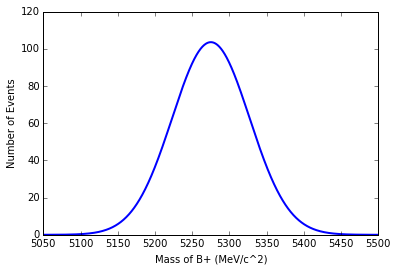

In [44]:
from scipy import stats as st

def PlotGauss(mean, sigma, yield_):
    x = linspace(5050, 5500, 1000)
    plot(x, st.norm.pdf(x, mean, sigma)*yield_, alpha = 1, linewidth = 2)
    #Plot the histogram for the B+ on this plot (between the range 5050 and 5500)
    plt.xlim(5050, 5500)
    xlabel('Mass of B+ (MeV/c^2)')
    ylabel('Number of Events')

xvalues = x=linspace(5050,5500,1000)
interact(PlotGauss, mean = [5250,5300,1], sigma = [5, 100, 1], yield_ =[2000,25000,50])

<function __main__.PlotGauss2>

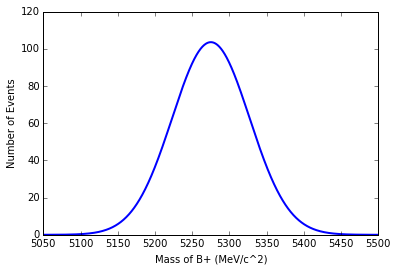

In [45]:
def PlotGauss2(mean, sigma, yield_):
    x = linspace(5050, 5500, 1000)
    plot(x, st.norm.pdf(x, mean, sigma)*yield_, alpha = 1, linewidth = 2)
    #Plot the histogram for the B- on this plot (between the range 5050 and 5500)
    plt.xlim(5050, 5500)
    xlabel('Mass of B- (MeV/c^2)')
    ylabel('Number of Events')

xvalues = x=linspace(5050,5500,1000)
interact(PlotGauss2, mean = [5250,5300,1], sigma = [5, 100, 1], yield_ =[2000,25000,50])

Now use the asymmetry formulae given previously to work out a new asymmetry value and significance!

In [ ]:
#Work out the asymmetry